In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%pip install pandas matplotlib scikit-learn seaborn --quiet

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv(r'titanic.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [5]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home_dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [7]:
import matplotlib.pyplot as plt

Należy usuwać n

In [8]:
# drop column that can coause data leakage

df = df.drop(['boat', 'body'], axis=1)
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home_dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN


In [9]:
# change pclass and survived to categorical
df = df.astype({'pclass': 'object', 'survived': 'object'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   object 
 1   survived   1309 non-null   object 
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  home_dest  745 non-null    object 
dtypes: float64(2), int64(2), object(8)
memory usage: 122.8+ KB


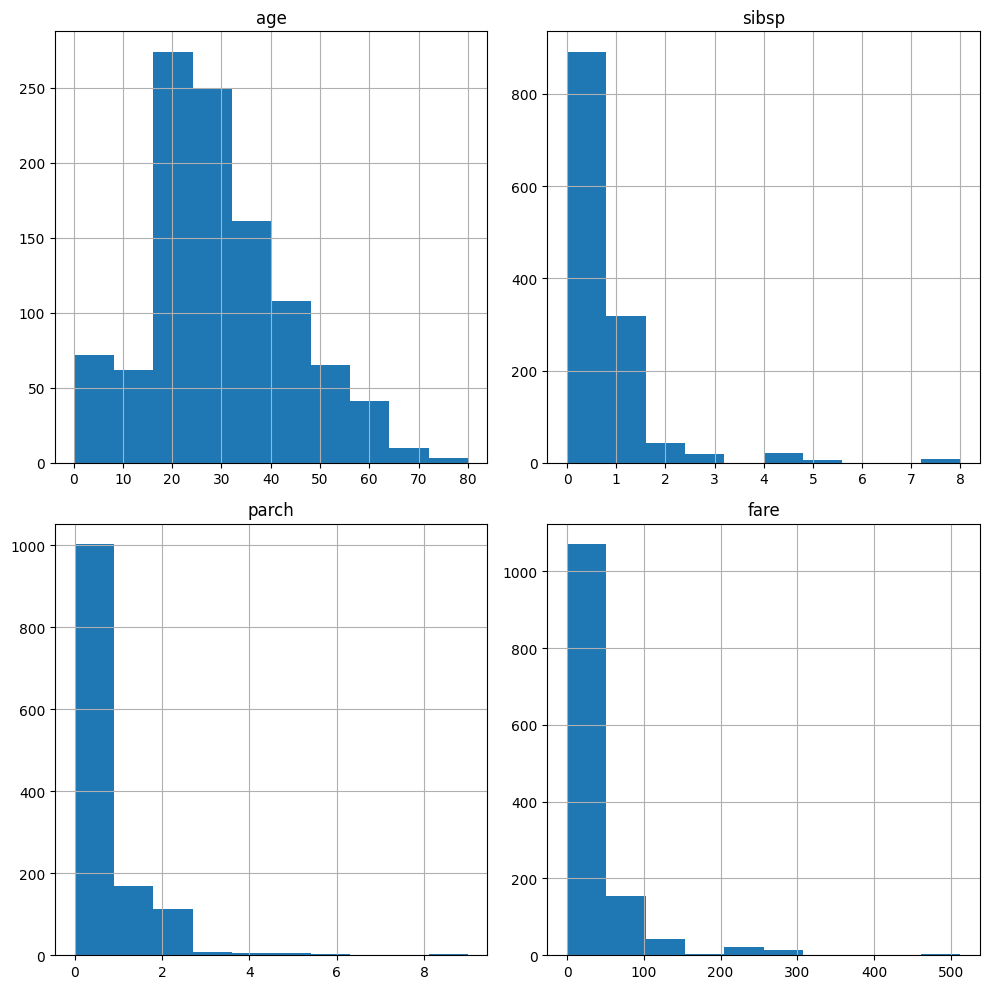

In [10]:
# plot histogram
fig, ax = plt.subplots(figsize=(10, 10))
# without survived
df.drop(['survived'], axis=1).hist(ax=ax)
fig.tight_layout()
plt.show()

In [11]:
# prepare numerical data
df_num = df.select_dtypes(include=['int64', 'float64'])
df_num

,age,sibsp,parch,fare
0,29.0000,0,0,211.3375
1,0.9167,1,2,151.5500
2,2.0000,1,2,151.5500
3,30.0000,1,2,151.5500
4,25.0000,1,2,151.5500
...,...,...,...,...
1304,14.5000,1,0,14.4542
1305,NaN,1,0,14.4542
1306,26.5000,0,0,7.2250
1307,27.0000,0,0,7.2250


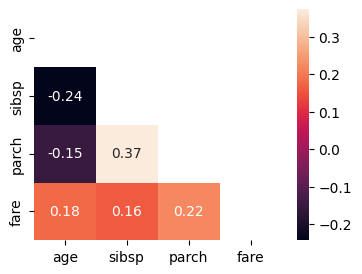

In [12]:
# corelation matrix and plot heatmap, only for numeric columns
import seaborn as sns

import numpy as np
import seaborn as sns

corr = df_num.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(1, 1, figsize=(4, 3))
sns.heatmap(corr, annot=True, mask=mask, ax=ax)
plt.show()



Żadna z korelacji nie jest znacząca

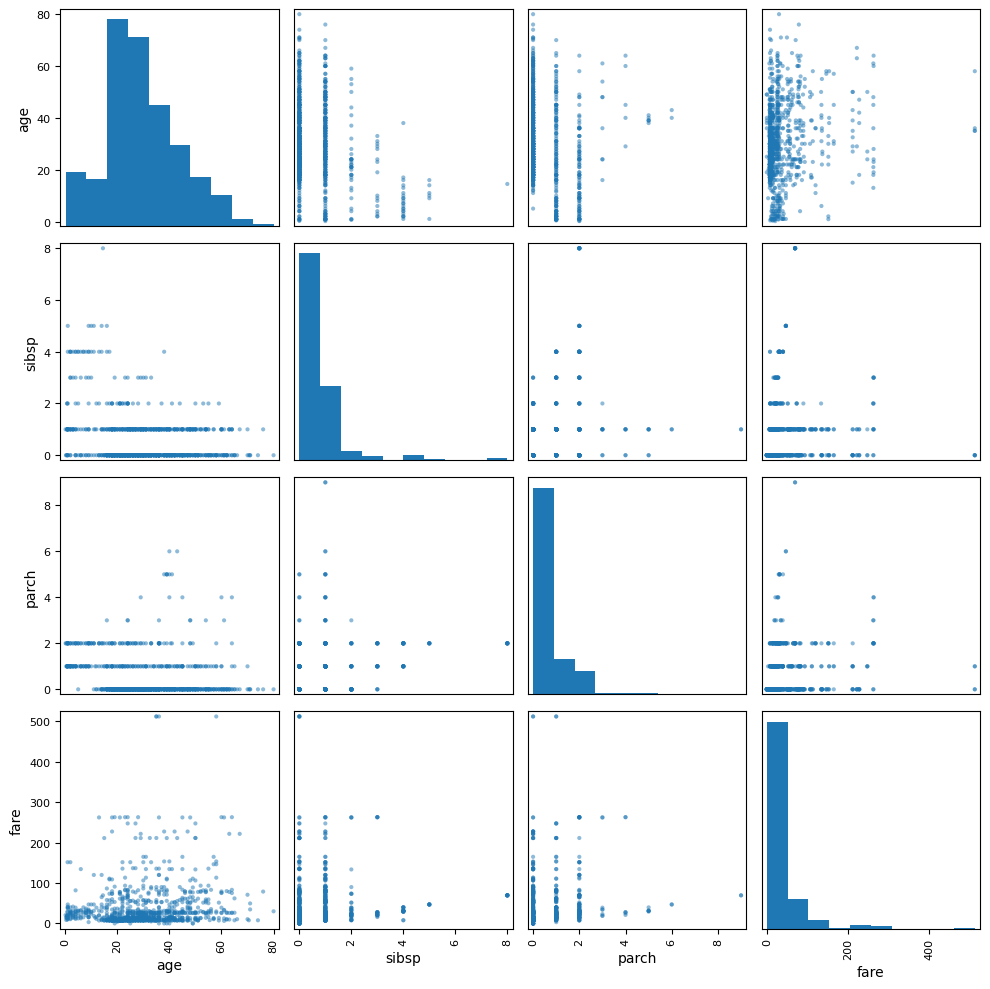

In [13]:
# plot scatter matrix
from pandas.plotting import scatter_matrix
fig, ax = plt.subplots(figsize=(10, 10))
scatter_matrix(df_num, ax=ax, grid=True)
fig.tight_layout()
plt.show()


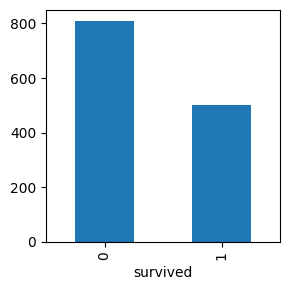

In [14]:
# print class distribution
fig, ax = plt.subplots(figsize=(3, 3))
df['survived'].value_counts().plot(kind='bar', ax=ax)
fig.tight_layout()
plt.show()


In [15]:
# class distributin in %
df['survived'].value_counts(normalize=True) * 100.0


survived
0    61.802903
1    38.197097
Name: proportion, dtype: float64

In [16]:
# count nan values in percentage
df.isna().sum()/len(df)*100

pclass        0.000000
survived      0.000000
name          0.000000
sex           0.000000
age          20.091673
sibsp         0.000000
parch         0.000000
ticket        0.000000
fare          0.076394
cabin        77.463713
embarked      0.152788
home_dest    43.086325
dtype: float64

In [17]:
# list columns with more than 25% nan values
columns_to_drop = df.columns[df.isna().sum()/len(df)*100 > 25]
columns_to_drop

Index(['cabin', 'home_dest'], dtype='object')

In [18]:
# drop columns with more than 25% nan values
df = df.drop(columns=columns_to_drop)
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,C
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,C
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,C
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,C


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   object 
 1   survived  1309 non-null   object 
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1046 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   ticket    1309 non-null   object 
 8   fare      1308 non-null   float64
 9   embarked  1307 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 102.4+ KB


In [20]:
# print other columns with nan values with number of nan values
df.isna().sum()


pclass        0
survived      0
name          0
sex           0
age         263
sibsp         0
parch         0
ticket        0
fare          1
embarked      2
dtype: int64

Jak widać w cesze `fare` brakuje tylko 1 obserwacji a w `embarked` 2. W obu przypadkach można je uzupełnić średnią (dla `fare`) lub modą (dla `embarked`).

In [21]:
# fill embarked and fare nan values with most common value
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
df['fare'] = df['fare'].fillna(df['fare'].median())

W przypadku kolumny `age` liczba brakujących wartości jest znacznie większa. W tym przypadku uzupełnienie średnią lub medianą nie jest dobrym pomysłem, ponieważ może to znacząco zaburzyć rozkład zmiennej. Postaram uzupełnić brakujące wartości biorąc pod uwagę tytuł osoby. W tym celu wykorzystam kolumnę `name`.

### Anlaiza tytułów w kontekście wieku

In [22]:
# extract title from name
def extract_title(name):
    return name.split(',')[1].split('.')[0].strip()

df = df.assign(title=df['name'].apply(extract_title))
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,Master
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,Mrs
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,C,Miss
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,C,Miss
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,C,Mr
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,C,Mr


In [23]:
# priint avarage age for each title and number of records
df.groupby('title')['age'].agg(['count','mean', 'median', 'min', 'max']).sort_values(by='count', ascending=False)

,count,mean,median,min,max
title,,,,,
Mr,581,32.252151,29.0,11.0000,80.0
Miss,210,21.774207,22.0,0.1667,63.0
Mrs,170,36.994118,35.5,14.0000,76.0
Master,53,5.482704,4.0,0.3333,14.5
Rev,8,41.250000,41.5,27.0000,57.0
Dr,7,43.571429,49.0,23.0000,54.0
Col,4,54.000000,54.5,47.0000,60.0
Mlle,2,24.000000,24.0,24.0000,24.0
Major,2,48.500000,48.5,45.0000,52.0


In [24]:
# fill age nan values with avarage age for each title
df['age'] = df.groupby('title')['age'].transform(lambda x: x.fillna(x.mean()))
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.000000,0,0,24160,211.3375,S,Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.916700,1,2,113781,151.5500,S,Master
2,1,0,"Allison, Miss. Helen Loraine",female,2.000000,1,2,113781,151.5500,S,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1,2,113781,151.5500,S,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1,2,113781,151.5500,S,Mrs
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.500000,1,0,2665,14.4542,C,Miss
1305,3,0,"Zabour, Miss. Thamine",female,21.774207,1,0,2665,14.4542,C,Miss
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.500000,0,0,2656,7.2250,C,Mr
1307,3,0,"Zakarian, Mr. Ortin",male,27.000000,0,0,2670,7.2250,C,Mr


In [25]:
# print number of nan values
df.isna().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
title       0
dtype: int64

### Dodanie nowych cech

In [26]:
# add family size column
df = df.assign(family_size=df['sibsp'] + df['parch'] + 1)
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,title,family_size
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.000000,0,0,24160,211.3375,S,Miss,1
1,1,1,"Allison, Master. Hudson Trevor",male,0.916700,1,2,113781,151.5500,S,Master,4
2,1,0,"Allison, Miss. Helen Loraine",female,2.000000,1,2,113781,151.5500,S,Miss,4
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1,2,113781,151.5500,S,Mr,4
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1,2,113781,151.5500,S,Mrs,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.500000,1,0,2665,14.4542,C,Miss,2
1305,3,0,"Zabour, Miss. Thamine",female,21.774207,1,0,2665,14.4542,C,Miss,2
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.500000,0,0,2656,7.2250,C,Mr,1
1307,3,0,"Zakarian, Mr. Ortin",male,27.000000,0,0,2670,7.2250,C,Mr,1


In [27]:
# show max age
df['age'].max()

80.0

In [28]:
# add age_range column [Bobas, Dziecko, Nastolatek, Dorosły ] [6, 12, 18]
df = df.assign(age_range=pd.cut(df['age'], bins=[0, 6, 12, 18, 81], labels=['Bobas', 'Dziecko', 'Nastolatek', 'Dorosły']))
## last bin is 200 to prevent error
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,title,family_size,age_range
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.000000,0,0,24160,211.3375,S,Miss,1,Dorosły
1,1,1,"Allison, Master. Hudson Trevor",male,0.916700,1,2,113781,151.5500,S,Master,4,Bobas
2,1,0,"Allison, Miss. Helen Loraine",female,2.000000,1,2,113781,151.5500,S,Miss,4,Bobas
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1,2,113781,151.5500,S,Mr,4,Dorosły
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1,2,113781,151.5500,S,Mrs,4,Dorosły
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.500000,1,0,2665,14.4542,C,Miss,2,Nastolatek
1305,3,0,"Zabour, Miss. Thamine",female,21.774207,1,0,2665,14.4542,C,Miss,2,Dorosły
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.500000,0,0,2656,7.2250,C,Mr,1,Dorosły
1307,3,0,"Zakarian, Mr. Ortin",male,27.000000,0,0,2670,7.2250,C,Mr,1,Dorosły


In [29]:
# mpc = age * class as numeric column
df = df.assign(mpc=df['age'] * df['pclass'])
df = df.astype({'mpc': 'int64'})
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,title,family_size,age_range,mpc
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.000000,0,0,24160,211.3375,S,Miss,1,Dorosły,29
1,1,1,"Allison, Master. Hudson Trevor",male,0.916700,1,2,113781,151.5500,S,Master,4,Bobas,0
2,1,0,"Allison, Miss. Helen Loraine",female,2.000000,1,2,113781,151.5500,S,Miss,4,Bobas,2
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1,2,113781,151.5500,S,Mr,4,Dorosły,30
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1,2,113781,151.5500,S,Mrs,4,Dorosły,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.500000,1,0,2665,14.4542,C,Miss,2,Nastolatek,43
1305,3,0,"Zabour, Miss. Thamine",female,21.774207,1,0,2665,14.4542,C,Miss,2,Dorosły,65
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.500000,0,0,2656,7.2250,C,Mr,1,Dorosły,79
1307,3,0,"Zakarian, Mr. Ortin",male,27.000000,0,0,2670,7.2250,C,Mr,1,Dorosły,81


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   pclass       1309 non-null   object  
 1   survived     1309 non-null   object  
 2   name         1309 non-null   object  
 3   sex          1309 non-null   object  
 4   age          1309 non-null   float64 
 5   sibsp        1309 non-null   int64   
 6   parch        1309 non-null   int64   
 7   ticket       1309 non-null   object  
 8   fare         1309 non-null   float64 
 9   embarked     1309 non-null   object  
 10  title        1309 non-null   object  
 11  family_size  1309 non-null   int64   
 12  age_range    1309 non-null   category
 13  mpc          1309 non-null   int64   
dtypes: category(1), float64(2), int64(4), object(7)
memory usage: 134.6+ KB


### Outliery

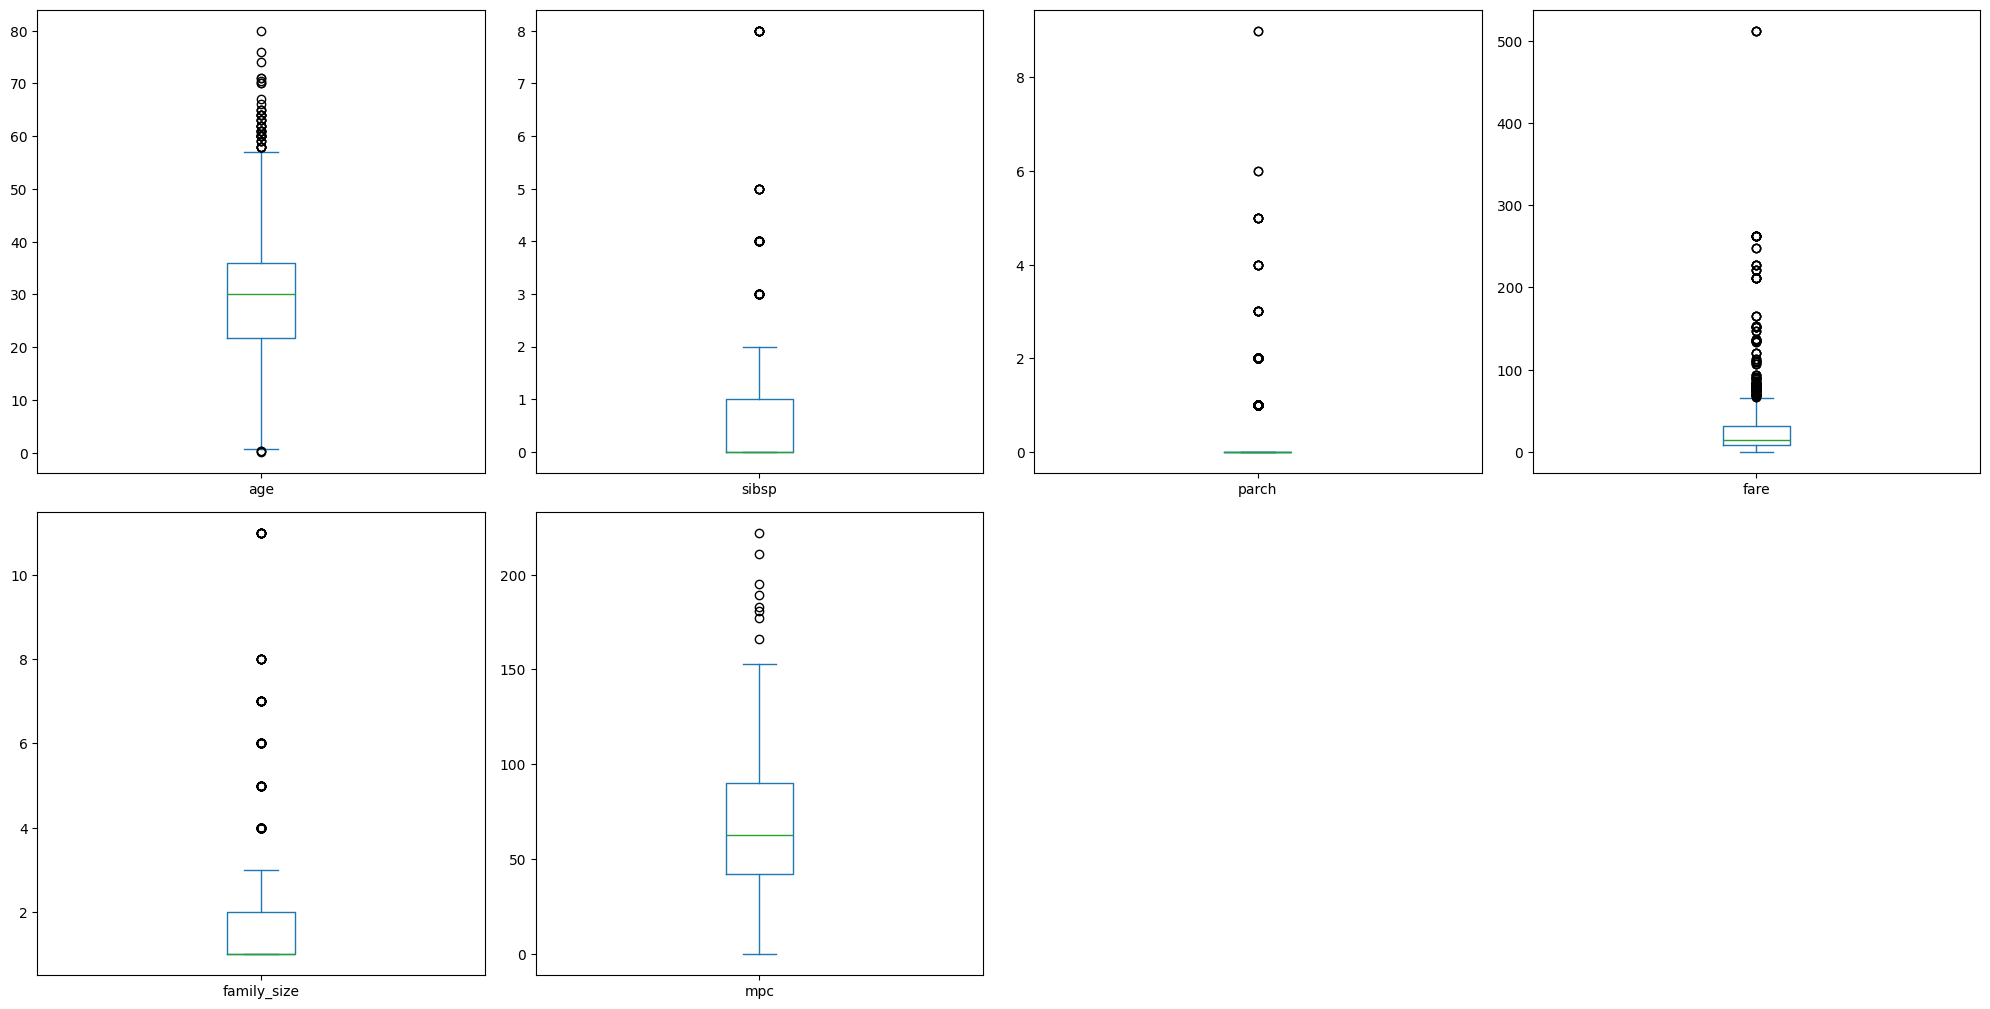

In [31]:
# plot boxplot
fig, ax = plt.subplots(figsize=(20, 20))
df.plot(kind='box', subplots=True, layout=(4, 4), sharex=False, sharey=False, ax=ax, fig=fig)
fig.tight_layout()
plt.show()

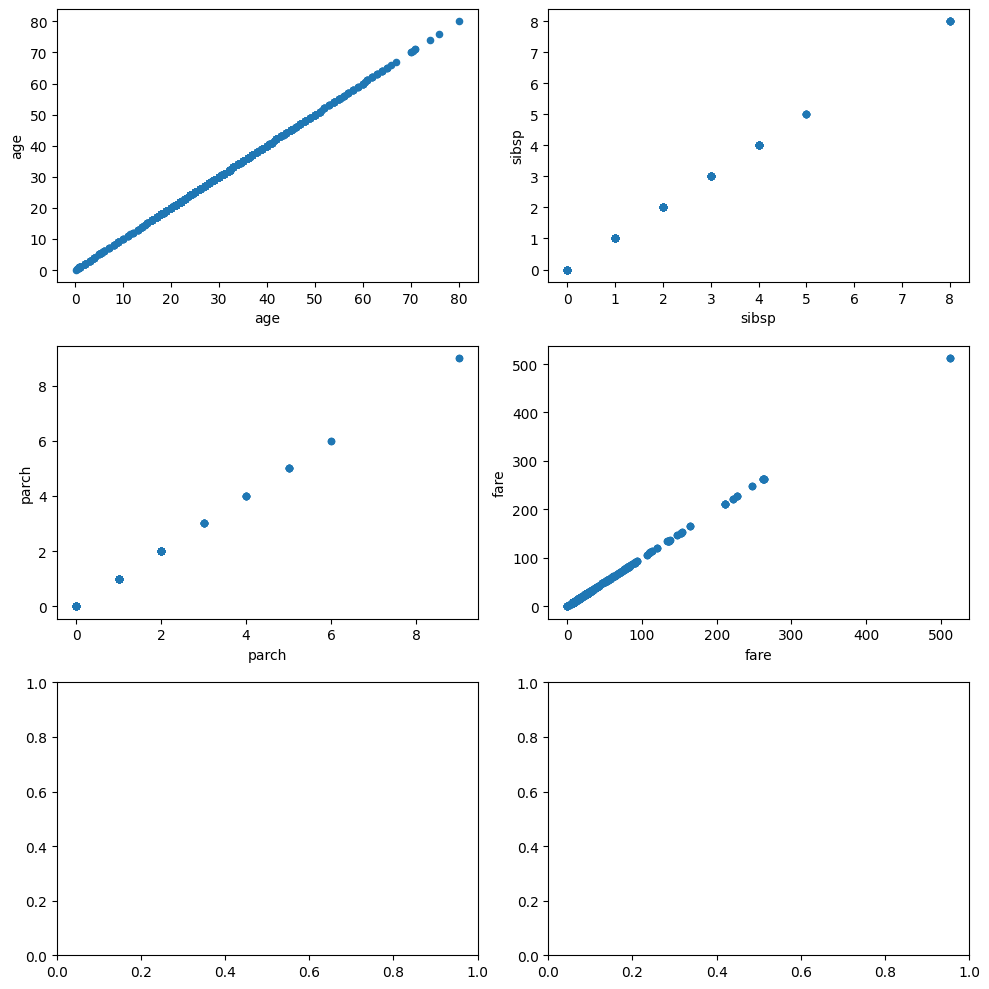

In [32]:
# plot scatter features vs features
fig, ax = plt.subplots((len(df_num.columns) // 2) + 1, 2, figsize=(10, 10))
for col in df_num.columns:
    df.plot.scatter(x=col, y=col, ax=ax[(df_num.columns.get_loc(col) // 2), (df_num.columns.get_loc(col) % 2)])
fig.tight_layout()
plt.show()


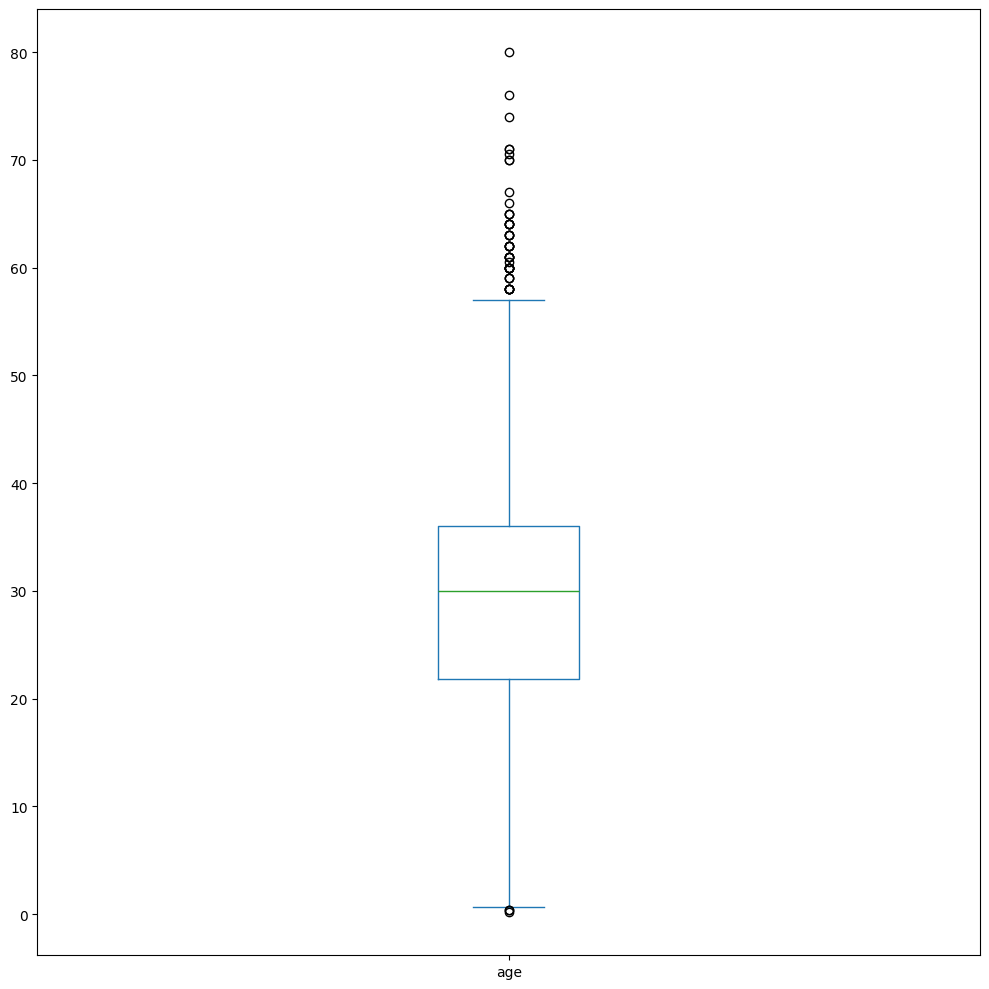

In [33]:
# plot boxplot for age
fig, ax = plt.subplots(figsize=(10, 10))
df['age'].plot(kind='box', ax=ax)
fig.tight_layout()
plt.show()


In [34]:
# detect outliers in each column using IQR. If value is lower than Q1 - 1.5 * IQR or higher than Q3 + 1.5 * IQR, then it is an outlier, chnage it to mean value
from scipy.stats import iqr

for col in df.columns:
    if df[col].dtype == 'int64' or df[col].dtype == 'float64':
        print(col, df[col].dtype)

        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr_val = q3 - q1

        print(f'min q1 - 1.5 * iqr_val: {q1 - 1.5 * iqr_val}')
        print(f'max q3 + 1.5 * iqr_val: {q3 + 1.5 * iqr_val}')
        print(f'min before: {df[col].min()}')
        print(f'max before: {df[col].max()}')

        df[col] = df[col].apply(lambda x: df[col].mean() if x <= (q1 - 1.5 * iqr_val) or x >= (q3 + 1.5 * iqr_val) else x)

        print(f'min after: {df[col].min()}')
        print(f'max after: {df[col].max()}')


df.head()

age float64
min q1 - 1.5 * iqr_val: 0.4355166666666612
max q3 + 1.5 * iqr_val: 57.33869
min before: 0.1667
max before: 80.0
min after: 0.6667
max after: 57.0
sibsp int64
min q1 - 1.5 * iqr_val: -1.5
max q3 + 1.5 * iqr_val: 2.5
min before: 0
max before: 8
min after: 0.0
max after: 2.0
parch int64
min q1 - 1.5 * iqr_val: 0.0
max q3 + 1.5 * iqr_val: 0.0
min before: 0
max before: 9
min after: 0.3850267379679144
max after: 0.3850267379679144
fare float64
min q1 - 1.5 * iqr_val: -27.172999999999995
max q3 + 1.5 * iqr_val: 66.34379999999999
min before: 0.0
max before: 512.3292
min after: 0.0
max after: 65.0
family_size int64
min q1 - 1.5 * iqr_val: -0.5
max q3 + 1.5 * iqr_val: 3.5
min before: 1
max before: 11
min after: 1.0
max after: 3.0
mpc int64
min q1 - 1.5 * iqr_val: -30.0
max q3 + 1.5 * iqr_val: 162.0
min before: 0
max before: 222
min after: 0.0
max after: 153.0


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,title,family_size,age_range,mpc
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.385027,24160,33.281086,S,Miss,1.000000,Dorosły,29.0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1.0,0.385027,113781,33.281086,S,Master,1.883881,Bobas,0.0
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,0.385027,113781,33.281086,S,Miss,1.883881,Bobas,2.0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,0.385027,113781,33.281086,S,Mr,1.883881,Dorosły,30.0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,0.385027,113781,33.281086,S,Mrs,1.883881,Dorosły,25.0


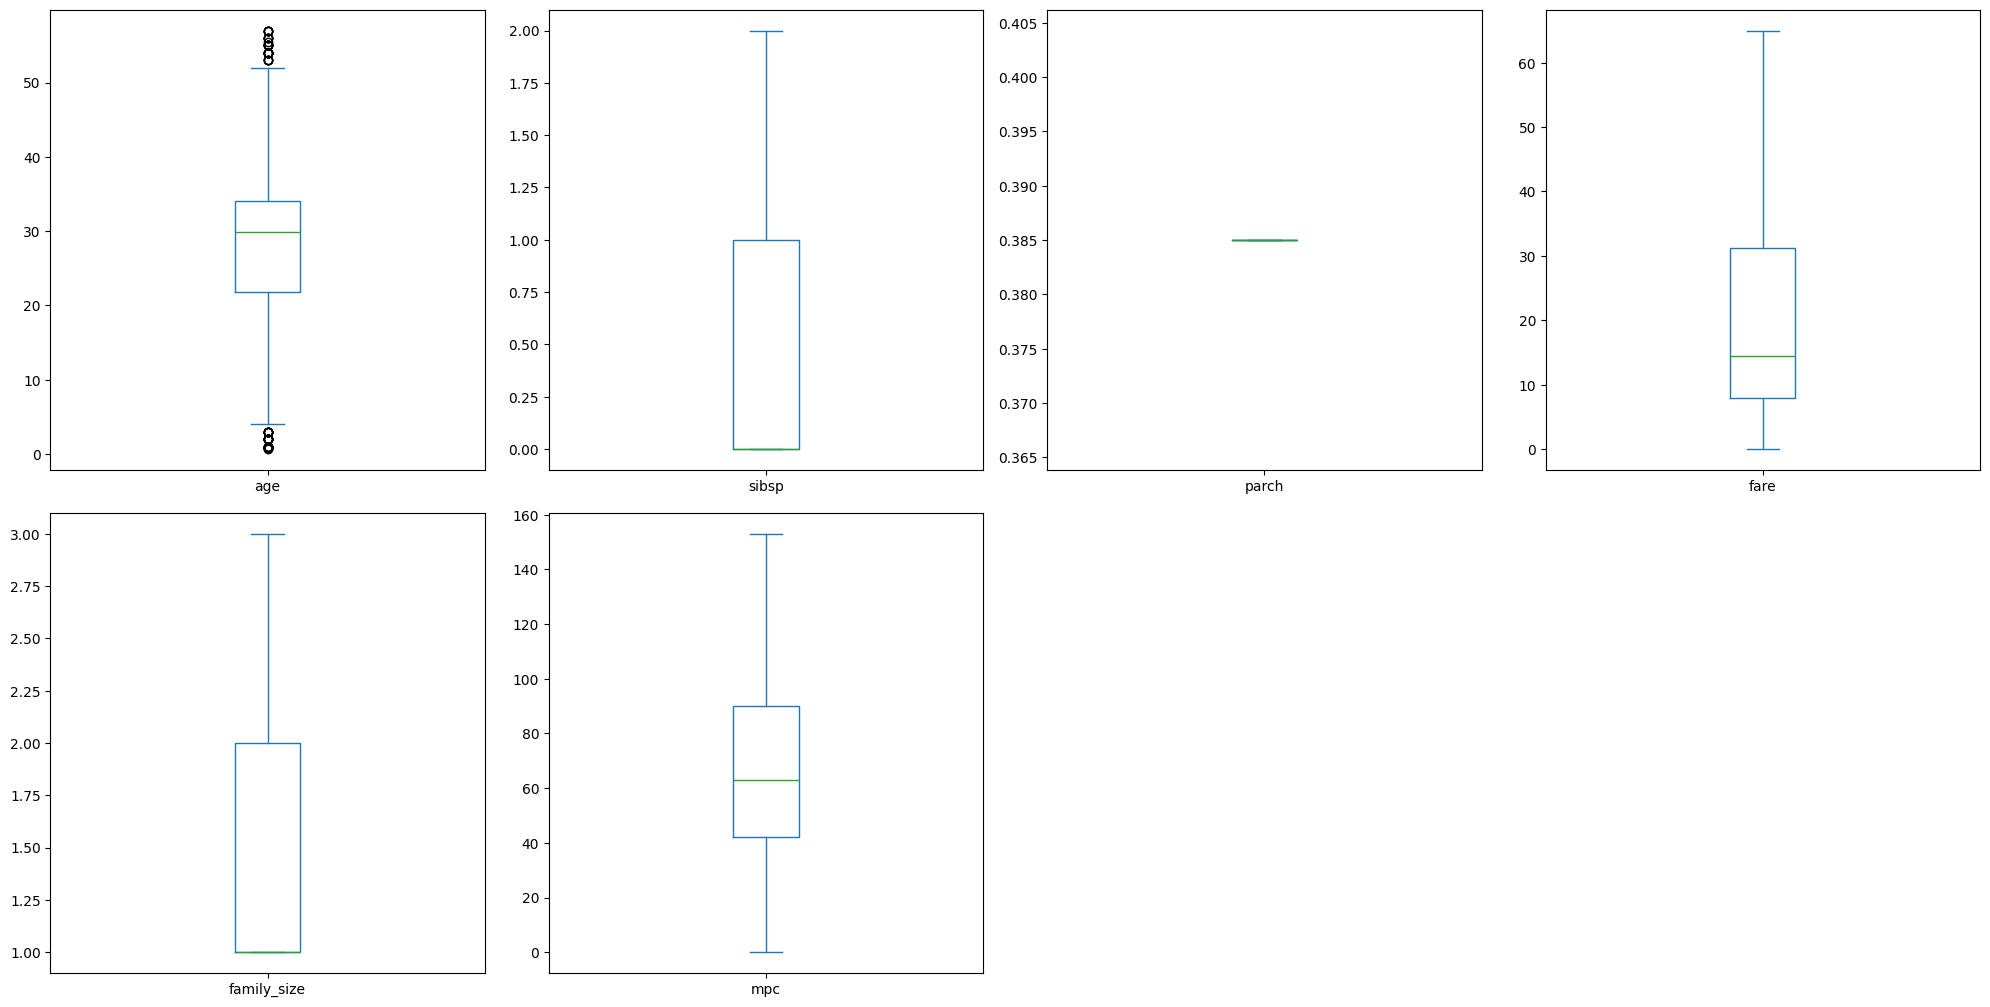

In [35]:
fig, ax = plt.subplots(figsize=(20, 20))
df.plot(kind='box', subplots=True, layout=(4, 4), sharex=False, sharey=False, ax=ax, fig=fig)
fig.tight_layout()
plt.show()

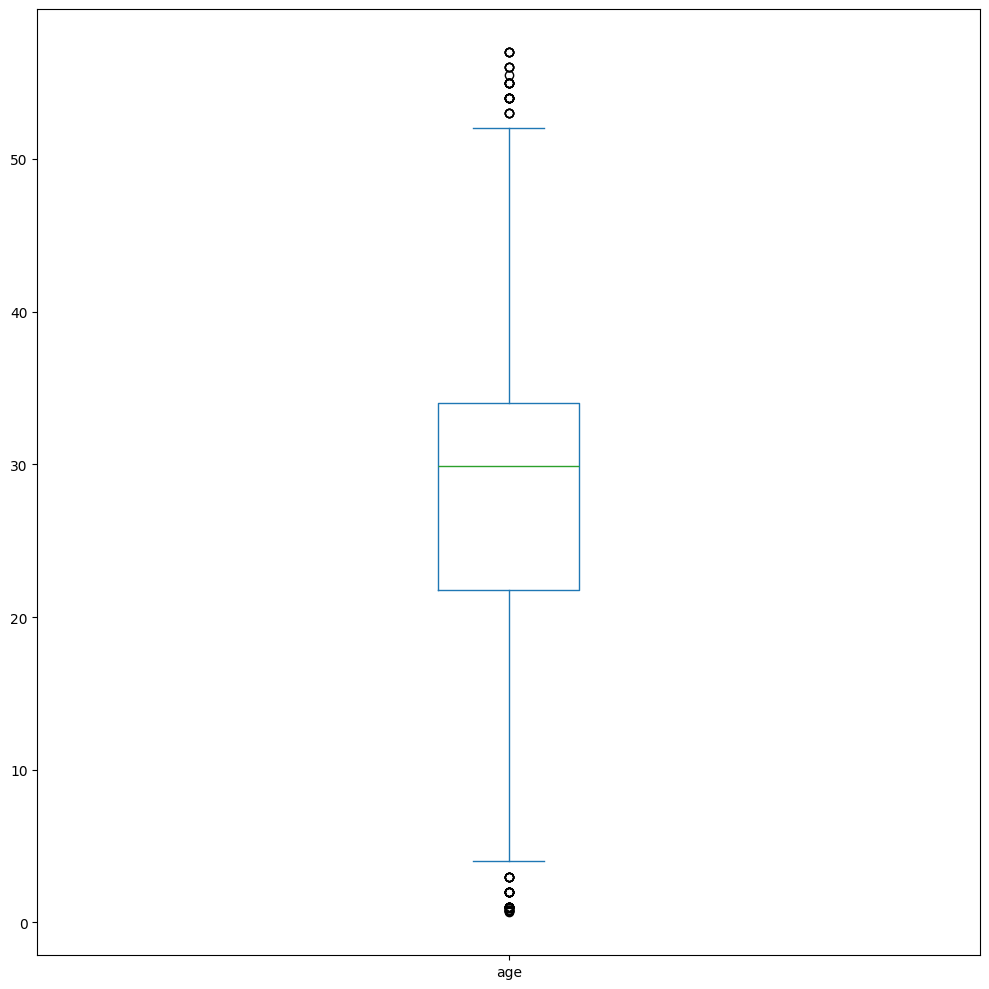

In [36]:
# plot boxplot for age
fig, ax = plt.subplots(figsize=(10, 10))
df['age'].plot(kind='box', ax=ax)
fig.tight_layout()
plt.show()

### Prepare data for ML
#### One hot encoding for categorical features

In [37]:
# drop unnecessary columns
df = df.drop(['name', 'ticket', 'title'], axis=1)

In [38]:
# take only necessary columns TODO: add mpc, age, pclass
df = df[['sex', 'age_range', 'fare', 'survived', 'mpc', 'family_size', 'pclass', 'age']]


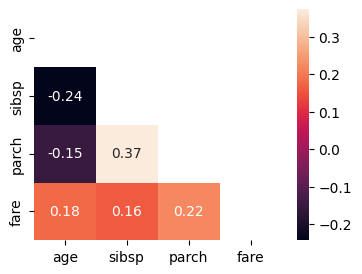

In [39]:
# corelation matrix and plot heatmap, only for numeric columns
import seaborn as sns

import numpy as np
import seaborn as sns

corr = df_num.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(1, 1, figsize=(4, 3))
sns.heatmap(corr, annot=True, mask=mask, ax=ax)
plt.show()

In [40]:
# split data into X and y
X = df.drop(['survived'], axis=1)
y = df['survived']
print(X.shape, y.shape)

(1309, 7) (1309,)


In [41]:
# one hot encoding for all categorical columns 
X = pd.get_dummies(X)
X

,fare,mpc,family_size,age,sex_female,sex_male,age_range_Bobas,age_range_Dziecko,age_range_Nastolatek,age_range_Dorosły,pclass_1,pclass_2,pclass_3
0,33.281086,29.0,1.000000,29.000000,True,False,False,False,False,True,True,False,False
1,33.281086,0.0,1.883881,0.916700,False,True,True,False,False,False,True,False,False
2,33.281086,2.0,1.883881,2.000000,True,False,True,False,False,False,True,False,False
3,33.281086,30.0,1.883881,30.000000,False,True,False,False,False,True,True,False,False
4,33.281086,25.0,1.883881,25.000000,True,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,14.454200,43.0,2.000000,14.500000,True,False,False,False,True,False,False,False,True
1305,14.454200,65.0,2.000000,21.774207,True,False,False,False,False,True,False,False,True
1306,7.225000,79.0,1.000000,26.500000,False,True,False,False,False,True,False,False,True
1307,7.225000,81.0,1.000000,27.000000,False,True,False,False,False,True,False,False,True


In [42]:
# y to numeric
y = y.astype('int64')
y

0       1
1       1
2       0
3       0
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    0
Name: survived, Length: 1309, dtype: int64

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)



(1047, 13) (1047,)
(262, 13) (262,)


In [44]:
# scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


In [45]:
def print_metrics(y_test, y_pred):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
    print('Accuracy: ', accuracy_score(y_test, y_pred))
    print('Precision: ', precision_score(y_test, y_pred))
    print('Recall: ', recall_score(y_test, y_pred))
    print('F1 score: ', f1_score(y_test, y_pred))
    print('Confusion matrix: ', confusion_matrix(y_test, y_pred))

In [46]:
def plot_confusion_matrix(y_test, y_pred):
    from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
    from sklearn.metrics import confusion_matrix
    fix, ax = plt.subplots(1, 1, figsize=(5, 5))
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot(ax=ax)
    plt.show()

In [47]:
def get_metrics(y_test, y_pred, name:str) -> dict:
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
    metrics = {}
    metrics['model'] = name
    metrics['accuracy'] = accuracy_score(y_test, y_pred)
    metrics['precision'] = precision_score(y_test, y_pred)
    metrics['recall'] = recall_score(y_test, y_pred)
    metrics['f1_score'] = f1_score(y_test, y_pred)
    metrics['confusion_matrix'] = confusion_matrix(y_test, y_pred)
    return metrics

In [48]:
def plot_roc_curve(y_test, y_pred):
    from sklearn.metrics import RocCurveDisplay, roc_curve
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    RocCurveDisplay.from_predictions(y_test, y_pred, ax=ax)
    plt.show()

# Trening modeli

In [49]:
all_metrics = {}

Accuracy:  0.8320610687022901
Precision:  0.8181818181818182
Recall:  0.72
F1 score:  0.7659574468085107
Confusion matrix:  [[146  16]
 [ 28  72]]


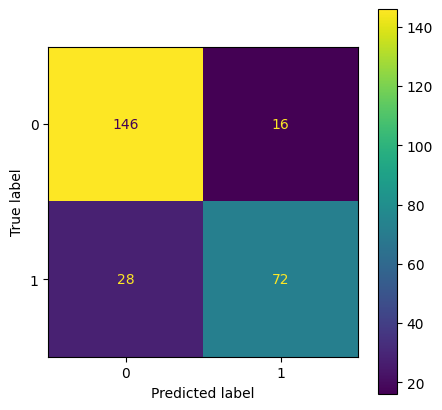

In [50]:
## train serveral models
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print_metrics(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred)
all_metrics['LogisticRegression'] = get_metrics(y_test, y_pred, 'LogisticRegression')

Accuracy:  0.7709923664122137
Precision:  0.7
Recall:  0.7
F1 score:  0.7
Confusion matrix:  [[132  30]
 [ 30  70]]


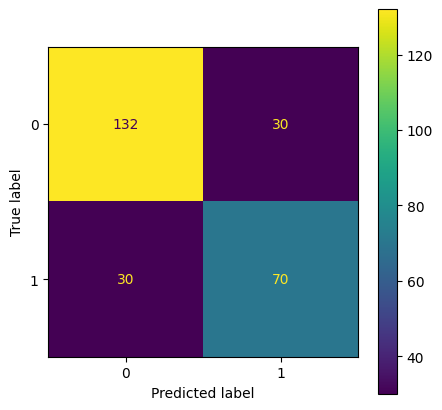

In [51]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print_metrics(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred)
all_metrics['DecisionTreeClassifier'] = get_metrics(y_test, y_pred, 'DecisionTreeClassifier')

Accuracy:  0.8091603053435115
Precision:  0.75
Recall:  0.75
F1 score:  0.75
Confusion matrix:  [[137  25]
 [ 25  75]]


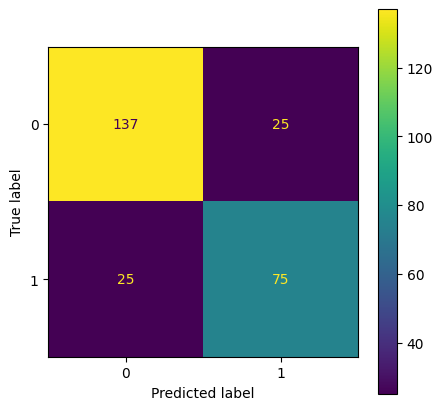

In [52]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print_metrics(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred)
all_metrics['RandomForestClassifier'] = get_metrics(y_test, y_pred, 'RandomForestClassifier')

Accuracy:  0.8358778625954199
Precision:  0.8
Recall:  0.76
F1 score:  0.7794871794871796
Confusion matrix:  [[143  19]
 [ 24  76]]


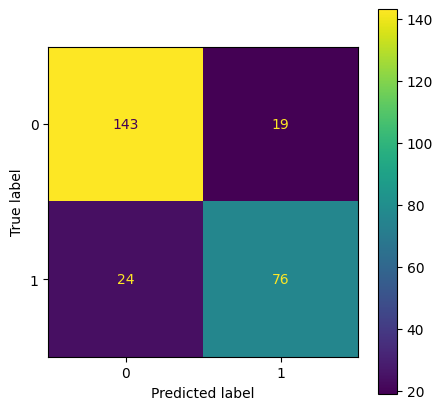

In [53]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print_metrics(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred)
all_metrics['KNeighborsClassifier'] = get_metrics(y_test, y_pred, 'KNeighborsClassifier')

Accuracy:  0.8358778625954199
Precision:  0.8352941176470589
Recall:  0.71
F1 score:  0.7675675675675675
Confusion matrix:  [[148  14]
 [ 29  71]]


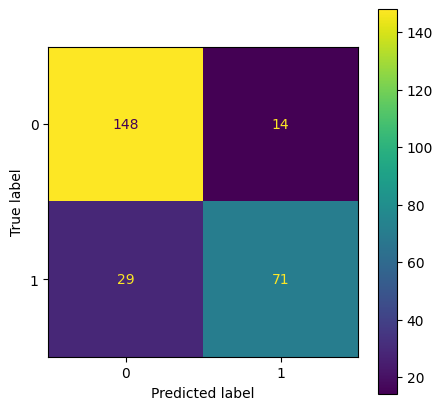

In [54]:
# SVM
from sklearn.svm import SVC
model = SVC()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print_metrics(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred)
all_metrics['SVC'] = get_metrics(y_test, y_pred, 'SVC')


Accuracy:  0.6412213740458015
Precision:  0.5405405405405406
Recall:  0.4
F1 score:  0.45977011494252873
Confusion matrix:  [[128  34]
 [ 60  40]]


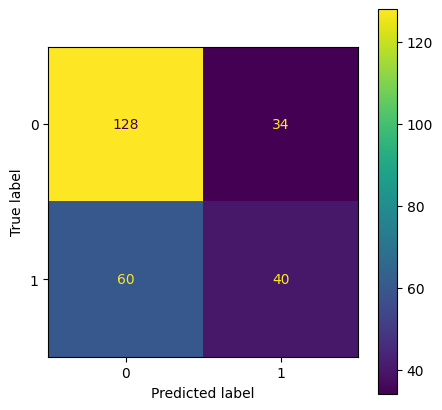

In [55]:
# Perceptron
from sklearn.linear_model import Perceptron
model = Perceptron()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print_metrics(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred)
all_metrics['Perceptron'] = get_metrics(y_test, y_pred, 'Perceptron')

Accuracy:  0.7862595419847328
Precision:  0.671875
Recall:  0.86
F1 score:  0.7543859649122807
Confusion matrix:  [[120  42]
 [ 14  86]]


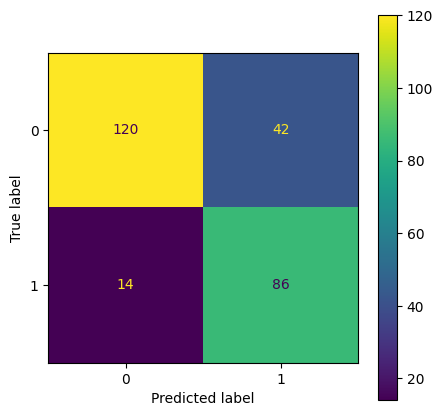

In [56]:
# Gradient Descent
from sklearn.linear_model import SGDClassifier
model = SGDClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print_metrics(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred)
all_metrics['SGDClassifier'] = get_metrics(y_test, y_pred, 'SGDClassifier')

In [57]:
# prepare metrics dataframe for visualization
metrics = pd.DataFrame(all_metrics).T
metrics = metrics.drop(columns=['model'])
metrics.index.name = 'model'
metrics

,accuracy,precision,recall,f1_score,confusion_matrix
model,,,,,
LogisticRegression,0.832061,0.818182,0.72,0.765957,"[[146, 16], [28, 72]]"
DecisionTreeClassifier,0.770992,0.7,0.7,0.7,"[[132, 30], [30, 70]]"
RandomForestClassifier,0.80916,0.75,0.75,0.75,"[[137, 25], [25, 75]]"
KNeighborsClassifier,0.835878,0.8,0.76,0.779487,"[[143, 19], [24, 76]]"
SVC,0.835878,0.835294,0.71,0.767568,"[[148, 14], [29, 71]]"
Perceptron,0.641221,0.540541,0.4,0.45977,"[[128, 34], [60, 40]]"
SGDClassifier,0.78626,0.671875,0.86,0.754386,"[[120, 42], [14, 86]]"


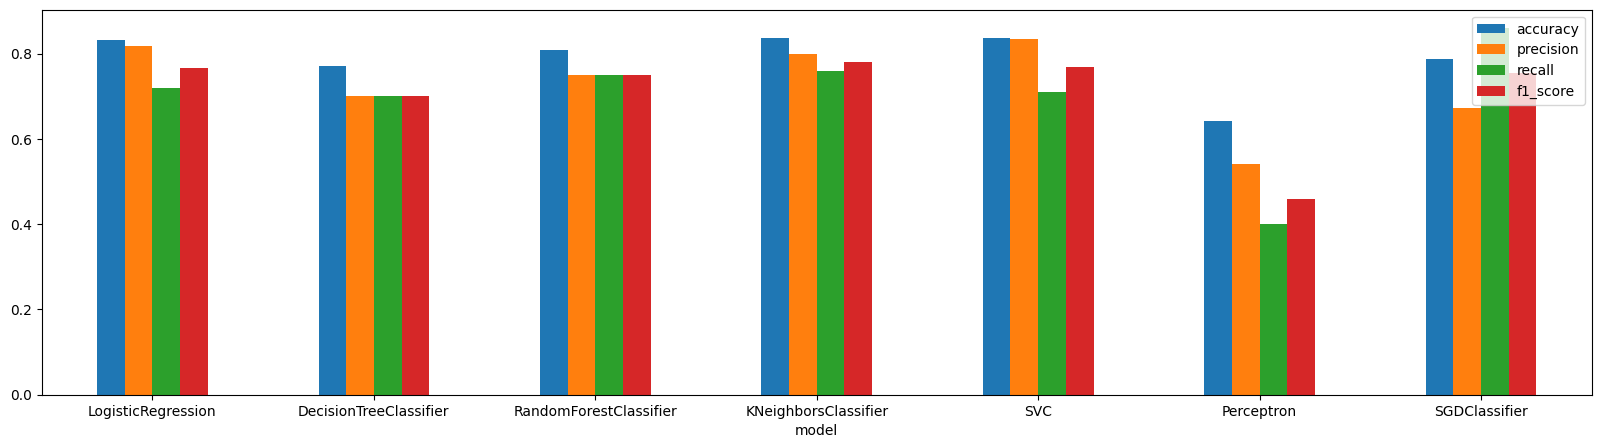

In [58]:
# plot metrics bar chart

fig, ax = plt.subplots(1, 1, figsize=(20, 5))
metrics.drop(['confusion_matrix'], axis=1).plot(kind='bar', ax=ax)
ax.set_xticklabels(metrics.index, rotation=0)
plt.show()

# Experymenty z Deep Learning

In [59]:
%pip install tensorflow --quiet

Note: you may need to restart the kernel to use updated packages.


In [60]:
%load_ext tensorboard

In [61]:
# create neural network
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, InputLayer
from keras.optimizers import Adam
# early stopping
from keras.callbacks import EarlyStopping
from keras.utils import plot_model

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto', restore_best_weights=True)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='logs', histogram_freq=1)

model = Sequential()


model.add(InputLayer(input_shape=(x_train.shape[1],), name='input'))
model.add(Dense(16, activation='relu', name='hidden_1'))
model.add(Dropout(0.15, name='dropout_1_0.15'))
model.add(Dense(8, activation='relu', name='hidden_2'))
model.add(Dense(1, activation='sigmoid', name='output'))
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


2024-01-22 23:32:34.763374: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-22 23:32:34.790616: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-22 23:32:34.790653: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-22 23:32:34.791417: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-22 23:32:34.796209: I tensorflow/core/platform/cpu_feature_guar

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_1 (Dense)            (None, 16)                224       
                                                                 
 dropout_1_0.15 (Dropout)    (None, 16)                0         
                                                                 
 hidden_2 (Dense)            (None, 8)                 136       
                                                                 
 output (Dense)              (None, 1)                 9         
                                                                 
Total params: 369 (1.44 KB)
Trainable params: 369 (1.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2024-01-22 23:32:35.967107: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-22 23:32:35.989786: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-22 23:32:35.989948: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [62]:
history = model.fit(x_train, y_train, epochs=500, batch_size=16, validation_data=(x_test, y_test), callbacks=[early_stopping, tensorboard_callback])
# history = model.fit(x_train, y_train, epochs=1000, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/500


2024-01-22 23:32:36.956788: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-01-22 23:32:39.293470: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fd9241e2990 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-01-22 23:32:39.293497: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-01-22 23:32:39.297455: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-01-22 23:32:39.538526: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1705962759.598684   50242 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


66/66 [==============================] - 3s 6ms/step - loss: 0.7701 - accuracy: 0.3754 - val_loss: 0.7579 - val_accuracy: 0.3359
Epoch 2/500
66/66 [==============================] - 0s 2ms/step - loss: 0.7501 - accuracy: 0.3964 - val_loss: 0.7418 - val_accuracy: 0.3664
Epoch 3/500
66/66 [==============================] - 0s 2ms/step - loss: 0.7349 - accuracy: 0.4212 - val_loss: 0.7269 - val_accuracy: 0.3893
Epoch 4/500
66/66 [==============================] - 0s 2ms/step - loss: 0.7283 - accuracy: 0.4422 - val_loss: 0.7133 - val_accuracy: 0.4122
Epoch 5/500
66/66 [==============================] - 0s 2ms/step - loss: 0.7151 - accuracy: 0.5033 - val_loss: 0.7009 - val_accuracy: 0.5115
Epoch 6/500
66/66 [==============================] - 0s 2ms/step - loss: 0.7034 - accuracy: 0.5215 - val_loss: 0.6892 - val_accuracy: 0.5611
Epoch 7/500
66/66 [==============================] - 0s 2ms/step - loss: 0.6900 - accuracy: 0.5521 - val_loss: 0.6780 - val_accuracy: 0.5763
Epoch 8/500
66/66 [======

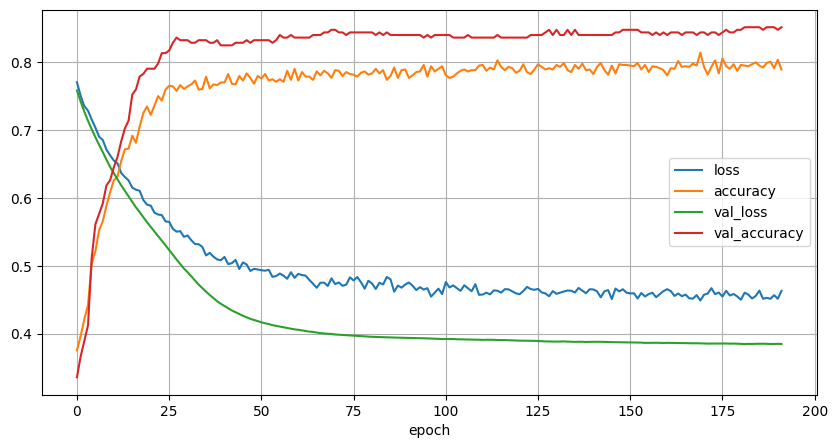

In [63]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
pd.DataFrame(history.history).plot(ax=ax)
ax.set_xlabel('epoch')
ax.grid()
plt.show()


In [64]:
pd.DataFrame(history.history).tail()

,loss,accuracy,val_loss,val_accuracy
187,0.452747,0.798472,0.384994,0.851145
188,0.451322,0.800382,0.384852,0.851145
189,0.456627,0.790831,0.384816,0.851145
190,0.451409,0.803247,0.384998,0.847328
191,0.463043,0.788921,0.384821,0.851145


9/9 [==============================] - 0s 758us/step
Accuracy:  0.851145038167939
Precision:  0.8674698795180723
Recall:  0.72
F1 score:  0.7868852459016394
Confusion matrix:  [[151  11]
 [ 28  72]]


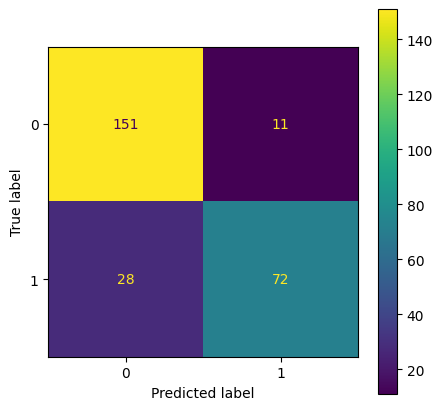

In [65]:
# print confusion matrix for tf model
y_pred = model.predict(x_test)
y_pred = np.round(y_pred)
print_metrics(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred)
all_metrics['NeuralNetwork'] = get_metrics(y_test, y_pred, 'NeuralNetwork')


## Prosty model z jedną warstwą ukrytą dał lepsz wynik niż klasyczne klaasyfikatory (SVM, Random Forest, Logistic Regression ...)

In [66]:
# print all metrics
metrics = pd.DataFrame(all_metrics).T
metrics.index.name = 'model'
metrics


,model,accuracy,precision,recall,f1_score,confusion_matrix
model,,,,,,
LogisticRegression,LogisticRegression,0.832061,0.818182,0.72,0.765957,"[[146, 16], [28, 72]]"
DecisionTreeClassifier,DecisionTreeClassifier,0.770992,0.7,0.7,0.7,"[[132, 30], [30, 70]]"
RandomForestClassifier,RandomForestClassifier,0.80916,0.75,0.75,0.75,"[[137, 25], [25, 75]]"
KNeighborsClassifier,KNeighborsClassifier,0.835878,0.8,0.76,0.779487,"[[143, 19], [24, 76]]"
SVC,SVC,0.835878,0.835294,0.71,0.767568,"[[148, 14], [29, 71]]"
Perceptron,Perceptron,0.641221,0.540541,0.4,0.45977,"[[128, 34], [60, 40]]"
SGDClassifier,SGDClassifier,0.78626,0.671875,0.86,0.754386,"[[120, 42], [14, 86]]"
NeuralNetwork,NeuralNetwork,0.851145,0.86747,0.72,0.786885,"[[151, 11], [28, 72]]"


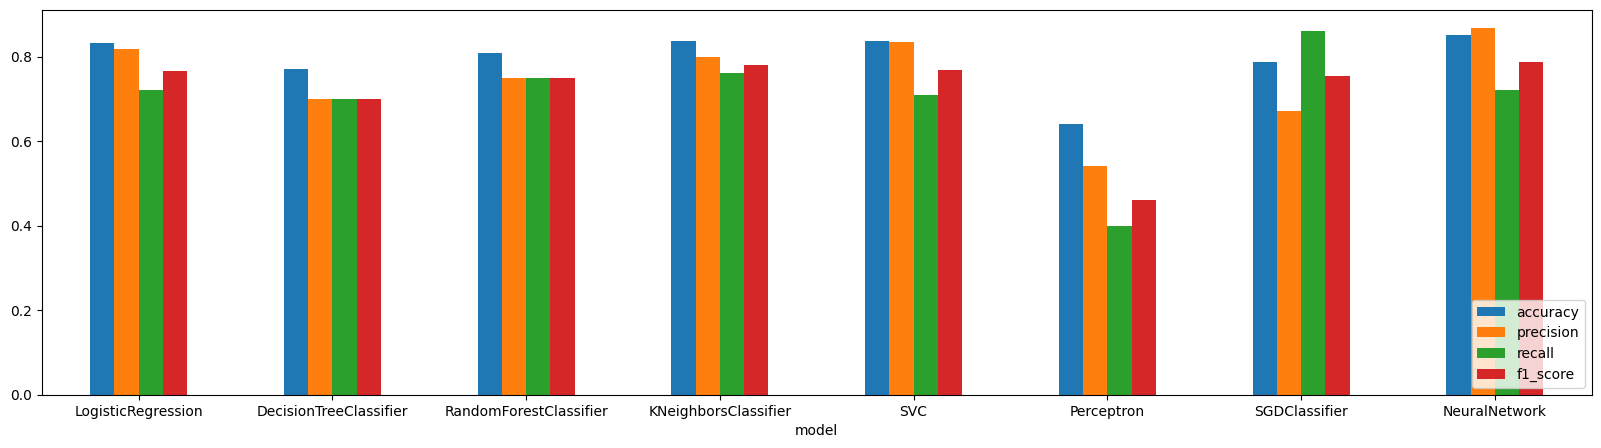

In [67]:
# plot metrics bar chart
fig, ax = plt.subplots(1, 1, figsize=(20, 5))
metrics.plot(kind='bar', ax=ax)
ax.set_xticklabels(metrics.index, rotation=0)
ax.legend(loc='lower right')
plt.show()


In [71]:
# find 2 best models
metrics.sort_values(by='accuracy', ascending=False).head(2)

,model,accuracy,precision,recall,f1_score,confusion_matrix
model,,,,,,
NeuralNetwork,NeuralNetwork,0.851145,0.86747,0.72,0.786885,"[[151, 11], [28, 72]]"
KNeighborsClassifier,KNeighborsClassifier,0.835878,0.8,0.76,0.779487,"[[143, 19], [24, 76]]"


<Axes: xlabel='model'>

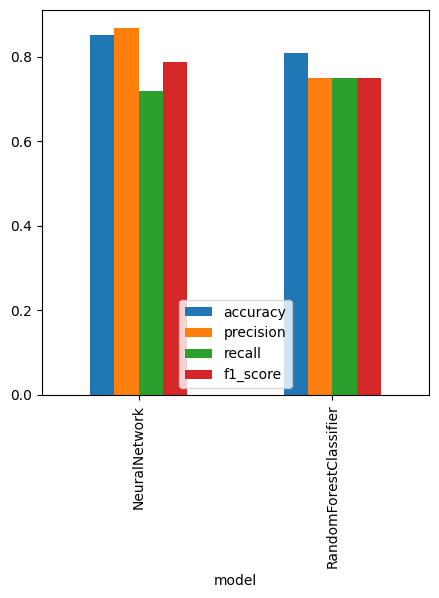

In [74]:
# plot 2 best models on one plot
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
metrics.loc[['NeuralNetwork', 'RandomForestClassifier'], ['accuracy', 'precision', 'recall', 'f1_score']].plot(kind='bar', ax=ax)